<a href="https://colab.research.google.com/github/aditi24695/FastAI/blob/master/FastAI_L3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [4]:
pip install voila

  Using cached https://files.pythonhosted.org/packages/9a/06/4548f8f47955c0a8f4a6047b2dd929e04e7713b20961a2c1acaa6c78b2f0/nbconvert-6.0.6-py3-none-any.whl
ERROR: nbdev 1.1.0 has requirement nbconvert<6, but you'll have nbconvert 6.0.6 which is incompatible.
  Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1


In [7]:
from fastbook import *
from fastai.vision.widgets import *
from fastai.vision.all import *


In [8]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

# Data set has first character uppercase for cats 
def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.169095,0.036187,0.010149,01:25


epoch,train_loss,valid_loss,error_rate,time
0,0.062838,0.077862,0.012855,02:02


In [9]:
pip install azure.cognitiveservices.search.imagesearch

  Using cached https://files.pythonhosted.org/packages/fe/95/8ab27afeecc8d397eae889e3576b4e8884a60fa9ad0c9e0b43ecec89bf69/azure_cognitiveservices_search_imagesearch-2.0.0-py2.py3-none-any.whl


In [10]:
import os
# Key from Microsoft Azure Image API
key = os.environ.get('AZURE_SEARCH_KEY', 'c344db73d0b44b2f8b2735c3c1f7f7a0')
key1 = "c344db73d0b44b2f8b2735c3c1f7f7a0"


In [11]:
# Returns image details for the keyword 
from azure.cognitiveservices.search.imagesearch import ImageSearchClient as api
from msrest.authentication import CognitiveServicesCredentials as auth
import http.client, urllib.request, urllib.parse, urllib.error, base64

def search_image_bing(key, term, min_sz = 128):
  client = api('https://aditi24695.cognitiveservices.azure.com/', auth(key1))
  return L(client.images.search(query=term, count = 150, min_height = min_sz, min_width = min_sz ).value)

search_image_bing

<function __main__.search_image_bing>

In [12]:
# Returns 150 images and extracted url
results = search_image_bing(key, 'grizzly bear')
ims = results.attrgot('content_url')
len(ims)

150

In [13]:
# Select bear types for grizzly, black and teddy bear
bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears')

In [14]:
if not path.exists():
  path.mkdir()
  for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_image_bing(key, f'{o} bear')
    download_images(dest, urls=results.attrgot('content_url'))

In [15]:
fns = get_image_files(path)
fns

(#424) [Path('bears/teddy/00000098.jpg'),Path('bears/teddy/00000110.jpg'),Path('bears/teddy/00000086.jpg'),Path('bears/teddy/00000146.JPG'),Path('bears/teddy/00000114.jpg'),Path('bears/teddy/00000108.gif'),Path('bears/teddy/00000059.jpeg'),Path('bears/teddy/00000099.jpg'),Path('bears/teddy/00000009.jpg'),Path('bears/teddy/00000024.jpg')...]

In [16]:
failed = verify_images(fns)
failed


(#0) []

In [17]:
failed.map(Path.unlink)

(#0) []

In [18]:
bears = DataBlock(
    blocks =(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.3, seed = 42),
    get_y = parent_label,
    item_tfms = Resize(128)    
)

In [19]:
dls = bears.dataloaders(path)

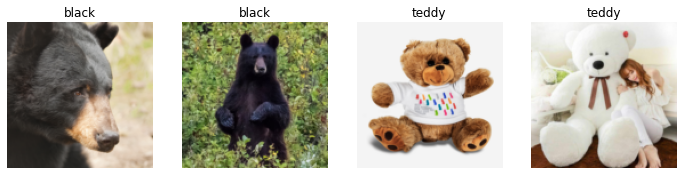

In [20]:
dls.valid.show_batch(max_n = 4, nrows = 1)

In [21]:
bears  = bears.new(
    item_tfms = RandomResizedCrop(224, min_scale=0.5),
    batch_tfms = aug_transforms() 
)

dls = bears.dataloaders(path)

In [22]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.233660,0.249751,0.125984,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.240606,0.056312,0.015748,00:16
1,0.163005,0.037243,0.007874,00:15
2,0.125946,0.042146,0.007874,00:16
3,0.093162,0.045183,0.007874,00:16


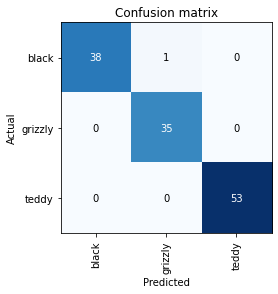

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

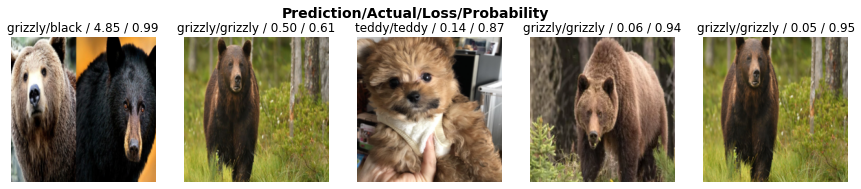

In [24]:
interp.plot_top_losses(5, nrows = 1)

In [25]:
learn.export()

In [26]:
path = Path()
path.ls(file_exts='.pkl')
learn_inf = load_learner(path/'export.pkl')

In [27]:
learn_inf.predict('bears/teddy/00000110.jpg')


('teddy', tensor(2), tensor([2.9145e-06, 5.8091e-06, 9.9999e-01]))

In [28]:
learn_inf.dls.vocab

(#3) ['black','grizzly','teddy']

In [29]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [30]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [31]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

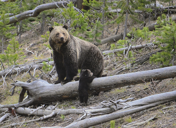

In [33]:
img = PILImage.create(btn_upload.data[-1])
img

In [34]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [36]:
lbl_pred = widgets.Label()
lbl_pred.value = "Please choose an image"
lbl_pred




Label(value='Please choose an image')

In [37]:
btn_run = widgets.Button(description= "Classify")
btn_run

Button(description='Classify', style=ButtonStyle())

In [38]:
def on_click_classify(change):
   img = PILImage.create(btn_upload.data[-1])
   out_pl.clear_output
   with out_pl: display(img.to_thumb(128, 128))
   pred, pred_idx, probs = learn_inf.predict(img)
   lbl_pred.value = f'Prediction {pred}'
btn_run.on_click(on_click_classify)


In [39]:
btn_upload = widgets.FileUpload()

In [40]:
VBox([widgets.Label('Select your bear!'), btn_upload, btn_run, out_pl, lbl_pred])